## Importing the required libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import sklearn
import scipy # for statistics and maths part

from pylab import rcParams # For visualization
rcParams['figure.figsize'] = 16, 12

Random_Seed = 101 # fixing the data number
Labels = ['Normal', 'Fraud'] # Labels for the dataset

In [2]:
os.getcwd()

'/Users/priyankac/Downloads/Banking Domain-Credit Card Fraud Detection'

## Importing the dataset

In [3]:
data = pd.read_csv('CreditCard (2).csv', sep = ',')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Understanding the dataset

In [4]:
# Check the number of rows and columns in the dataset
data.shape

(284807, 31)

In [5]:
# Check for the basic data information
data.info()

# The dataframe contains 284807 rows and 31 columns
# There are 30 columns of data type float and 1 column is data type integer

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
# Check for the basic data summary
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.758702e-12,-8.252296e-13,-9.637438e-13,8.316234e-13,1.592013e-13,4.247308e-13,-3.050183e-13,8.692882e-14,-1.179710e-12,...,-3.406538e-13,-5.713357e-13,-9.725290e-13,1.464144e-12,-6.989090e-13,-5.615254e-13,3.332111e-12,-3.518885e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## Data Preprocessing

In [7]:
# Step 1 : Check for missing values
data.isnull().sum()

# No missing data in the dataset

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
# Step 2 : Label encoder
# Since there is no char variable, so encoding is not required

In [9]:
# Step 3 : Outlier treatment
# It is a classification problem and most of the values in the variables fall between 0 and 1
# It is a credit card fraudulant problem(anomaly detection problem), so outliers are not treated 

In [10]:
# Step 4 : Feature Scaling
# Not performing 

In [11]:
# Step 5 : Check Imbalanced dataset
data['Class'].value_counts()

# The dataset is highly imbalanced since the majority class(0) is greater than 2*minority class(1)
# Approach : Since this is a credit card fraud detection data, we will not balance the data

0    284315
1       492
Name: Class, dtype: int64

## EDA - Exploratory Data Analysis

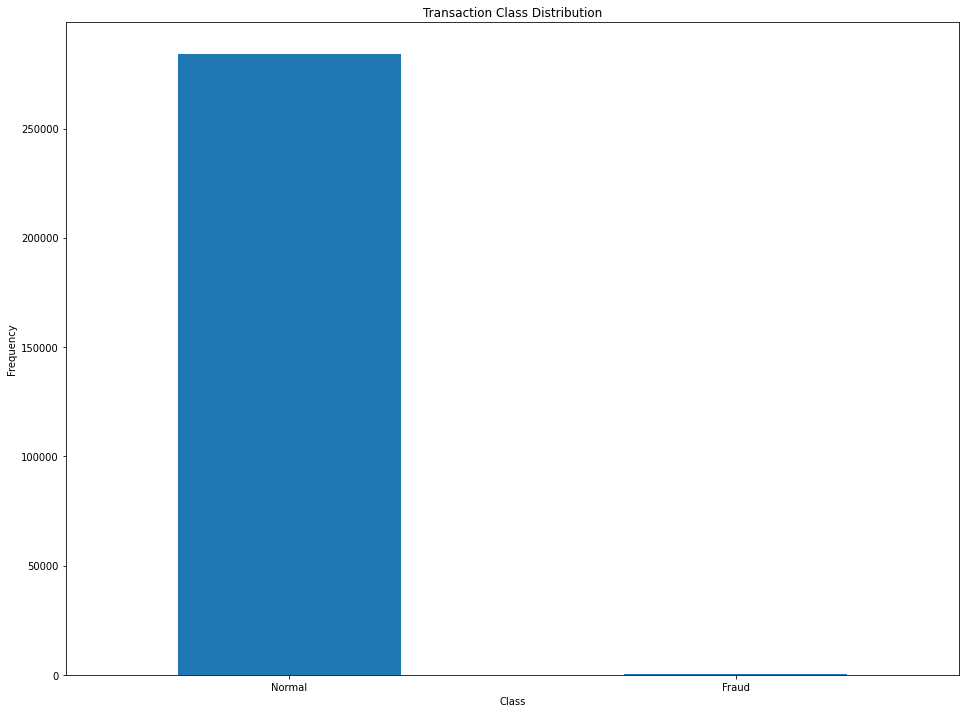

In [12]:
# Visualize the distribution in the dependent variable 'Class'
count_class = pd.value_counts(data["Class"], sort = True)
count_class.plot(kind = 'bar', rot = 0)
plt.title('Transaction Class Distribution')
plt.xticks(range(2), Labels)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

In [13]:
# Check the number of records for fraud and normal transactions
fraud = data[data['Class']==1]
normal = data[data['Class']==0]

print('fraud data : ', fraud.shape)
print('normal data : ', normal.shape)

fraud data :  (492, 31)
normal data :  (284315, 31)


In [14]:
# Check the total amount in the normal transaction data
normal['Amount'].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [15]:
# Check the total amount in the fraud transaction
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

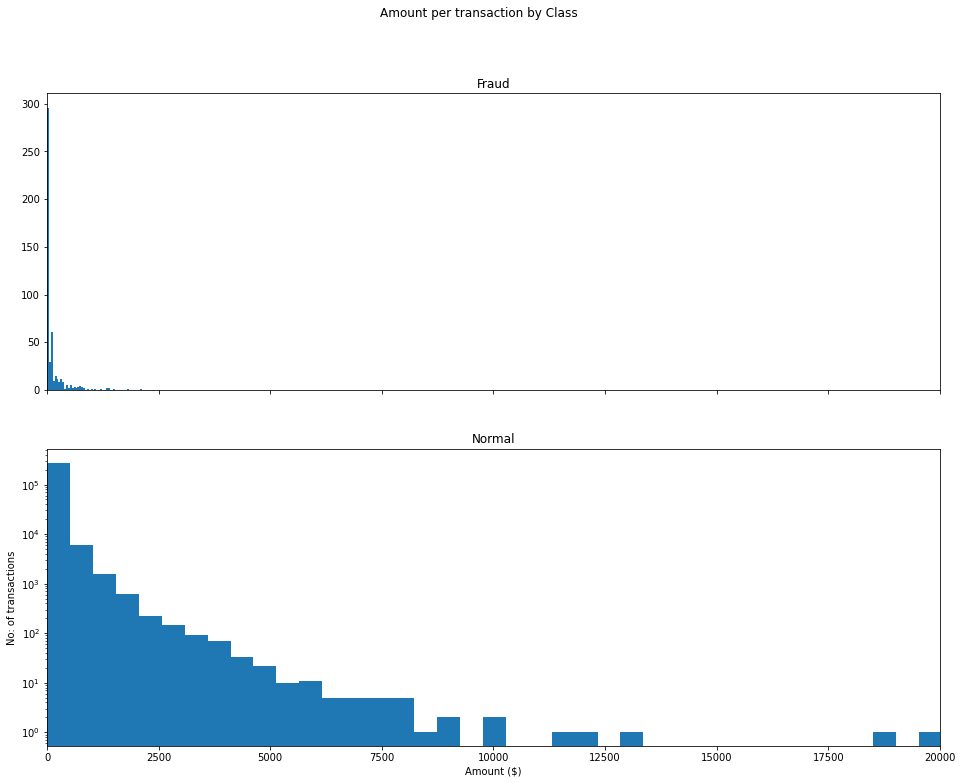

In [16]:
# Visualize the amount per transaction in the normal and the fraud transactions
f, (ax1, ax2)= plt.subplots(2, 1, sharex = True)
f.suptitle('Amount per transaction by Class')

bins = 50
ax1.hist(fraud.Amount, bins = bins)
ax1.set_title('Fraud')

ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Normal')

plt.xlabel('Amount ($)')
plt.ylabel('No: of transactions')

plt.xlim(0,20000)
plt.yscale('log')
plt.show()

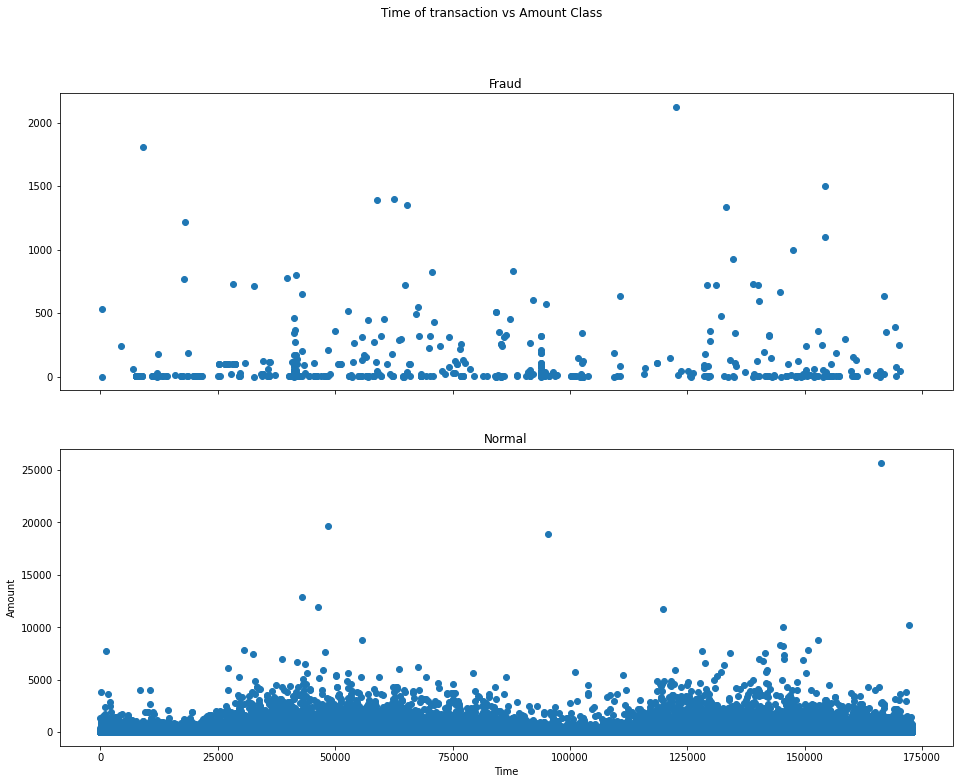

In [17]:
# Visualize the Time of transaction  vs Amount in the normal and the fraud transactions
f, (ax1, ax2)= plt.subplots(2, 1, sharex = True)
f.suptitle('Time of transaction vs Amount Class')

bins = 50
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')

ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Normal')

plt.xlabel('Time')
plt.ylabel('Amount')

plt.show()

# From the graph we can say that the fraud had occured uniformly throughout the entire time as the scatter plot 
# follows uniform distribution
# Very few customers had done fraud over 1000$


In [18]:
# Check the total percentage of fraudulant happened out of total transactions done
outlier_fraction = 492/(492+284315)
outlier_fraction


0.001727485630620034

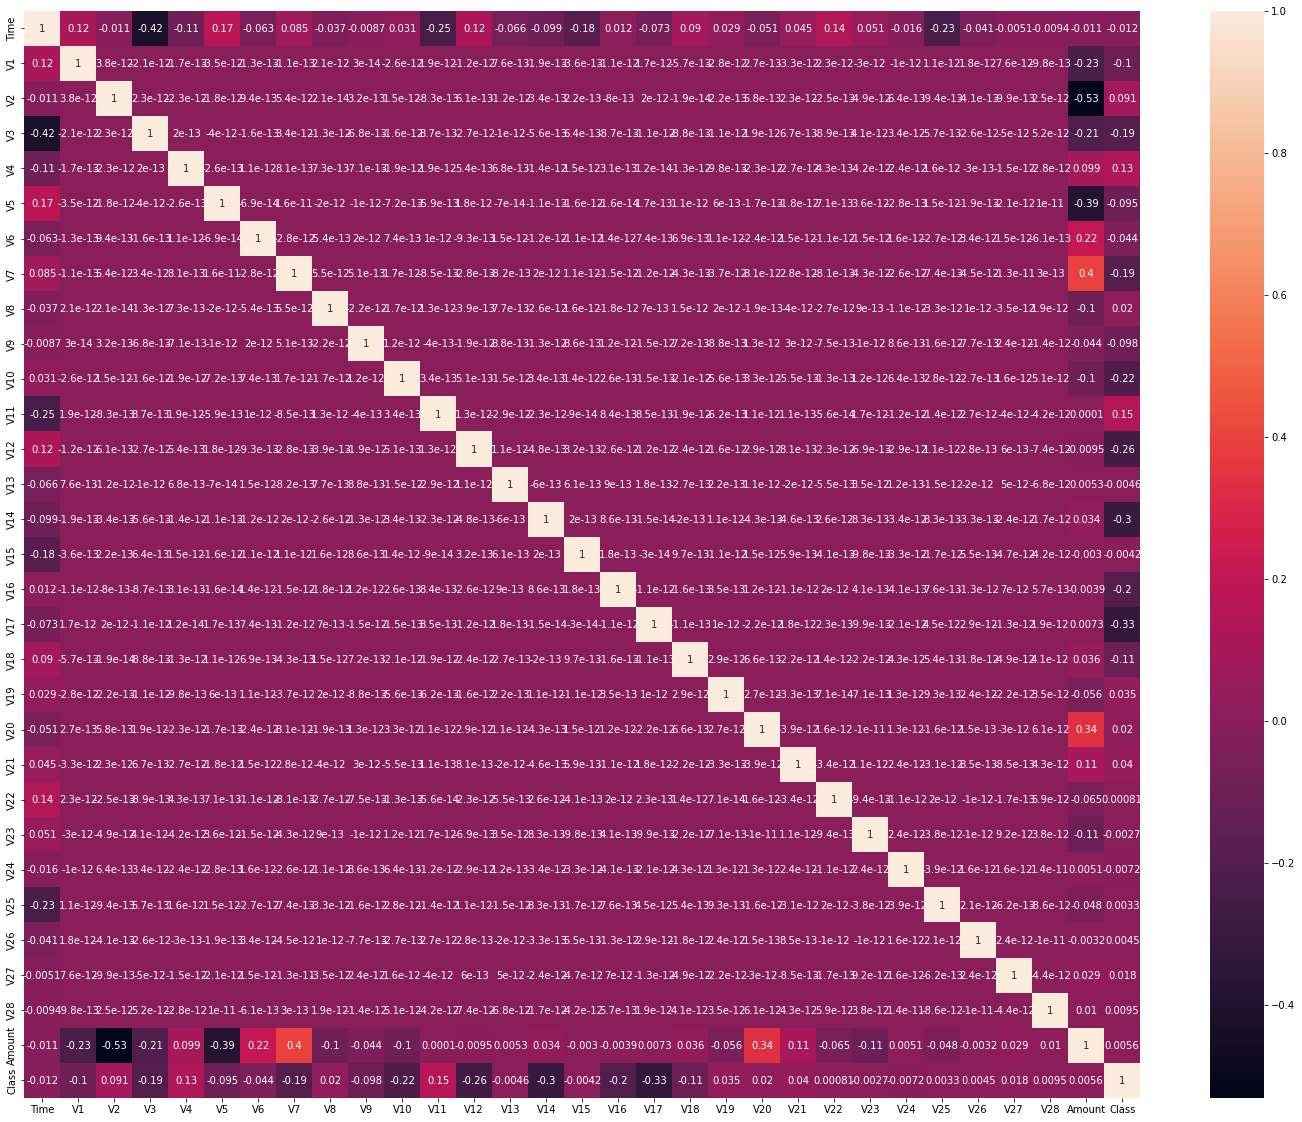

In [19]:
# Check for Correlation using Heat map
plt.figure(figsize=(25,20))
g = sns.heatmap(data.corr(), annot = True)


In [20]:
columns = data.columns
columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [26]:
# Split the data into target variable and feature variable
x = data.iloc[:, 0:-1]
y = data['Class']

state = np.random.RandomState(101)
x_outlier = state.uniform(low = 0, high = 1, size = (x.shape[0], x.shape[1]))

print('Shape of x : ', x.shape)
print('Shape of y : ', y.shape)

Shape of x :  (284807, 30)
Shape of y :  (284807,)


In [22]:
x.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [23]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

## Train Test Split

In [29]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=110)

print('x_train size : ', x_train.shape)
print('x_test size : ', x_test.shape)
print('y_train size : ', y_train.shape)
print('y_test size : ', y_test.shape)

x_train size :  (199364, 30)
x_test size :  (85443, 30)
y_train size :  (199364,)
y_test size :  (85443,)


## Build Logistic Regression Model

In [31]:
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression()
logit.fit(x_train, y_train)

LogisticRegression()

In [32]:
y_pred_train = logit.predict(x_train)
y_pred_test = logit.predict(x_test)

In [33]:
# Model Evaluation
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [41]:
print(classification_report(y_train, y_pred_train))
print('######'*50)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199012
           1       0.67      0.69      0.68       352

    accuracy                           1.00    199364
   macro avg       0.84      0.84      0.84    199364
weighted avg       1.00      1.00      1.00    199364

############################################################################################################################################################################################################################################################################################################
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85303
           1       0.66      0.64      0.65       140

    accuracy                           1.00     85443
   macro avg       0.83      0.82      0.82     85443
weighted avg       1.00      1.00      1.00     85443



In [40]:
print(accuracy_score(y_train, y_pred_train))
print('#################')
print(accuracy_score(y_test, y_pred_test))

0.9988613791858109
#################
0.9988647402361809


In [39]:
print(confusion_matrix(y_train, y_pred_train))
print('######'*50)
print(confusion_matrix(y_test, y_pred_test))

[[198895    117]
 [   110    242]]
############################################################################################################################################################################################################################################################################################################
[[85256    47]
 [   50    90]]


## Build Decision Tree Model

In [43]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(criterion='entropy')
dtree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [45]:
y_pred_train = dtree.predict(x_train)
y_pred_test = dtree.predict(x_test)

In [46]:
# Model Evaluation

print(classification_report(y_train, y_pred_train))
print('######'*50)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199012
           1       1.00      1.00      1.00       352

    accuracy                           1.00    199364
   macro avg       1.00      1.00      1.00    199364
weighted avg       1.00      1.00      1.00    199364

############################################################################################################################################################################################################################################################################################################
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85303
           1       0.78      0.79      0.78       140

    accuracy                           1.00     85443
   macro avg       0.89      0.89      0.89     85443
weighted avg       1.00      1.00      1.00     85443



In [47]:
print(accuracy_score(y_train, y_pred_train))
print('#################')
print(accuracy_score(y_test, y_pred_test))

1.0
#################
0.9992860737567735


In [48]:
print(confusion_matrix(y_train, y_pred_train))
print('######'*50)
print(confusion_matrix(y_test, y_pred_test))

[[199012      0]
 [     0    352]]
############################################################################################################################################################################################################################################################################################################
[[85272    31]
 [   30   110]]


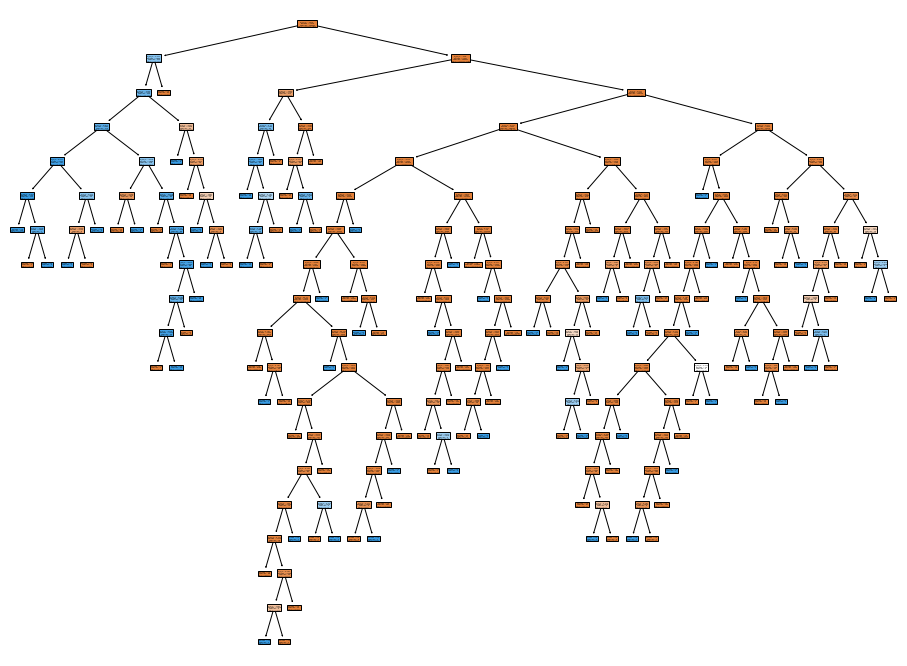

In [49]:
# Visualize the decision tree
from sklearn import tree

tree.plot_tree(dtree, filled = True)
plt.show()

## Build Random Forest Model

In [51]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=500, criterion='entropy')
rfc.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=500)

In [52]:
y_pred_train = rfc.predict(x_train)
y_pred_test = rfc.predict(x_test)

In [53]:
# Model Evaluation

print(classification_report(y_train, y_pred_train))
print('######'*50)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199012
           1       1.00      1.00      1.00       352

    accuracy                           1.00    199364
   macro avg       1.00      1.00      1.00    199364
weighted avg       1.00      1.00      1.00    199364

############################################################################################################################################################################################################################################################################################################
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85303
           1       0.99      0.78      0.87       140

    accuracy                           1.00     85443
   macro avg       1.00      0.89      0.94     85443
weighted avg       1.00      1.00      1.00     85443



In [54]:
print(accuracy_score(y_train, y_pred_train))
print('#################')
print(accuracy_score(y_test, y_pred_test))

1.0
#################
0.9996254813150287


In [55]:
print(confusion_matrix(y_train, y_pred_train))
print('######'*50)
print(confusion_matrix(y_test, y_pred_test))

[[199012      0]
 [     0    352]]
############################################################################################################################################################################################################################################################################################################
[[85302     1]
 [   31   109]]


## Build XGBoost Model

In [57]:
from xgboost import XGBClassifier

xgb_classifier = XGBClassifier()
xgb_classifier.fit(x_train, y_train)

[10:46:09] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [58]:
y_pred_train = xgb_classifier.predict(x_train)
y_pred_test = xgb_classifier.predict(x_test)

In [59]:
# Model Evaluation
print(classification_report(y_train, y_pred_train))
print('######'*50)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199012
           1       1.00      1.00      1.00       352

    accuracy                           1.00    199364
   macro avg       1.00      1.00      1.00    199364
weighted avg       1.00      1.00      1.00    199364

############################################################################################################################################################################################################################################################################################################
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85303
           1       0.98      0.79      0.87       140

    accuracy                           1.00     85443
   macro avg       0.99      0.89      0.94     85443
weighted avg       1.00      1.00      1.00     85443



In [60]:
print(accuracy_score(y_train, y_pred_train))
print('#################')
print(accuracy_score(y_test, y_pred_test))

1.0
#################
0.9996254813150287


In [61]:
print(confusion_matrix(y_train, y_pred_train))
print('######'*50)
print(confusion_matrix(y_test, y_pred_test))

[[199012      0]
 [     0    352]]
############################################################################################################################################################################################################################################################################################################
[[85301     2]
 [   30   110]]


## Build Stacking Classifier Model

In [64]:
from mlxtend.classifier import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [66]:
from sklearn.model_selection import cross_val_score

clf1 = KNeighborsClassifier(n_neighbors=5)
clf2 = GaussianNB()
clf3 = RandomForestClassifier()
clf4 = LogisticRegression()
sclf = StackingClassifier(classifiers=[clf1, clf2, clf3, clf4], meta_classifier=clf4)

print('3 fold cross validation : \n')

for clf, label in zip([clf1, clf2, clf3, sclf], ['KNN', 'Naive Bayes', 'Random Forest', 'Stacking Classifier']):
    scores = cross_val_score(clf, x, y, cv=3, scoring = 'accuracy')
    print('Accuracy : %0.2f(+/-%0.2f)[%s]' % (scores.mean(), scores.std(), label))

3 fold cross validation : 

Accuracy : 0.49(+/-0.40)[KNN]
Accuracy : 0.99(+/-0.00)[Naive Bayes]
Accuracy : 0.67(+/-0.47)[Random Forest]
Accuracy : 0.67(+/-0.47)[Stacking Classifier]


## Local Outlier factor

In [72]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=20, contamination=outlier_fraction)

y_prediction = lof.fit_predict(x)

y_prediction[y_prediction == 1] = 0 # Valid transactions are labelled as 0
y_prediction[y_prediction == -1] = 1 # Fraudulant transactions are labelled as 1

errors = (y_prediction != y).sum() # Total number of errors is calculated

print('errors : ',errors)
print('accuracy : ', accuracy_score(y_prediction, y))
print(classification_report(y_prediction, y))
                 


errors :  934
accuracy :  0.9967205862215465
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.05      0.05      0.05       492

    accuracy                           1.00    284807
   macro avg       0.52      0.52      0.52    284807
weighted avg       1.00      1.00      1.00    284807



## Isolation Forest Model

In [71]:
from sklearn.ensemble import IsolationForest

iForest = IsolationForest(n_estimators=100, max_samples=len(x),
                                                      contamination = outlier_fraction).fit(x) # Fitting the model

y_prediction1 = iForest.predict(x) # Prediction

y_prediction1[y_prediction1 == 1] = 0 # Valid transactions are labelled as 0
y_prediction1[y_prediction1 == -1] = 1 # Fraudulant transactions are labelled as 1

errors = (y_prediction1 != y).sum() # Total number of errors is calculated

print('errors : ', errors)
print('accuray : ', accuracy_score(y_prediction1, y))
print(classification_report(y_prediction1, y))
 



errors :  658
accuray :  0.9976896635265284
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.33      0.33      0.33       492

    accuracy                           1.00    284807
   macro avg       0.67      0.67      0.67    284807
weighted avg       1.00      1.00      1.00    284807



In [ ]:
# Isolation factor is a better anomaly detection algorithm for the given dataset